http://cdn.cs50.net/2016/fall/lectures/7/notes7.html

# Machine Learning 的應用

這堂課只會講到 圖像辨識、自然語言處理

https://video.cs50.net/2016/fall/lectures/7?t=1h17m24s

# Supervised Learning

## 圖像辨識訓練

## Classifying points

In [1]:
import numpy as np                # for scientific computing
import matplotlib.pyplot as plt   # for generating plots

### Create training set, containing points and labels (colors) :

In [30]:
X_train = np.array( [  [1, 1], [2, 2.5], [3, 1.2], [5.5, 6.3], [6, 9], [7, 6]  ] )
Y_train = ["red", "red", "red", "blue", "blue", "blue"]

### We can think of X_train as two dimensional array : 

In [31]:
print(X_train[5, 0])  # 有點像R的list : X_train[5, 0] <- 選擇 X_train 第 5 個元素 : [7, 6] 當中的第 0 個元素 : 7
print(X_train[5, 1])  # 有點像R的list : X_train[5, 1] <- 選擇 X_train 第 5 個元素 : [7, 6] 當中的第 1 個元素 : 6

7.0
6.0


### Python has a convenient slicing syntax : 

In [32]:
print(X_train[ : , 0])  # 有點像R的list : X_train[ : , 0] <- 選擇 X_train 所有元素 : [1, 1], [2, 2.5], [3, 1.2], [5.5, 6.3], [6, 9], [7, 6] 當中的第 0 個元素 : 1, 2, 3, 5.5, 6, 7
print(X_train[ : , 1])  # 有點像R的list : X_train[ : , 1] <- 選擇 X_train 所有元素 : [1, 1], [2, 2.5], [3, 1.2], [5.5, 6.3], [6, 9], [7, 6] 當中的第 1 個元素 : 1, 2.5, 1.2, 6.3, 9, 6

[ 1.   2.   3.   5.5  6.   7. ]
[ 1.   2.5  1.2  6.3  9.   6. ]


### Plot the training set :

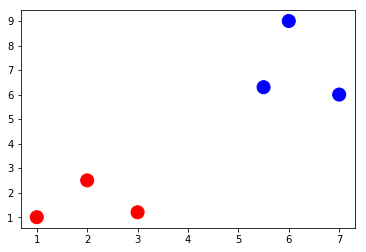

In [33]:
plt.figure()

# X_train[ : , 0] <- an array of horizontal coordinates (X坐標)
# X_train[ : , 1] <- an array of vertical coordinates   (Y坐標)
# s for size of point / s = 170是調整點的大小 (調大一點)
plt.scatter(X_train[ : , 0], X_train[ : , 1], color = Y_train[ : ], s = 170) 

plt.show()

In [34]:
X_test = np.array( [3, 4] )

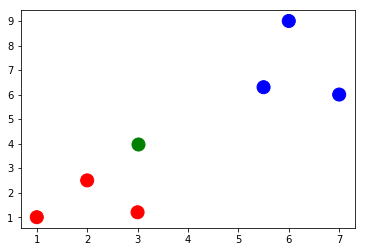

In [35]:
plt.figure()
plt.scatter(X_train[ : , 0], X_train[ : , 1], color = Y_train[ : ], s = 170) 
plt.scatter(X_test[0], X_test[1], color = "green", s = 170) 
plt.show()

-----------------------

# To run the Nearest Neighbor Classifier, define a distance function : 

In [44]:
def dist(x, y) :
    return np.sqrt( np.sum( (x - y)**2 ) )

-----------------------

### For each point in X_train, we can compute its distance to X_test : 

- X_train = np.array( [  [1, 1], [2, 2.5], [3, 1.2], [5.5, 6.3], [6, 9], [7, 6]  ] )

- X_test = np.array( [3, 4] )


Y_train = ["red", "red", "red", "blue", "blue", "blue"]

In [52]:
number_of_X_train = len(X_train)        # Number of points in X_train
distance = np.zeros(number_of_X_train)  # Numpy arrays of zeros

for i in range(0, number_of_X_train) :
    distance[i] = dist(X_train[i], X_test)
print(distance)

[ 3.60555128  1.80277564  2.8         3.39705755  5.83095189  4.47213595]


### Choose the point in X_train with the minimal distance from X_new (X_test) : 

In [53]:
min_index = np.argmin(distance)         # Index of the smallest distance
print(Y_train[min_index])

red


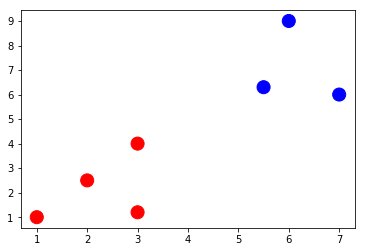

In [54]:
plt.figure()
plt.scatter(X_train[ : , 0], X_train[ : , 1], color = Y_train[ : ], s = 170) 
plt.scatter(X_test[0], X_test[1], color = Y_train[ : ], s = 170) 
plt.show()

------------------------------------------------------------------

# Python for Image Classification

## Classifying Images

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
import numpy as np                # for scientific computing
import matplotlib.pyplot as plt   # for generating plots

In [56]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


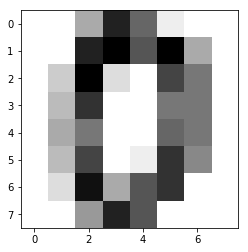

In [6]:
plt.figure()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = "nearest")
plt.show()

### Print true label : 

In [58]:
print(digits.target[0])

0


https://video.cs50.net/2016/fall/lectures/7?t=46m9s

https://video.cs50.net/2016/fall/lectures/7?t=46m55s

### Creat the training set ----- ------ by choosing the first 10 images in the data set :

In [41]:
X_train = digits.data[0:10]
Y_train = digits.target[0:10]

### To run the Nearest Neighbor Classifier, define a distance function :

In [12]:
def dist(x, y) :
    return np.sqrt( np.sum( (x - y)**2 ) )

### Choose a test image :

In [16]:
X_test = digits.data[345]

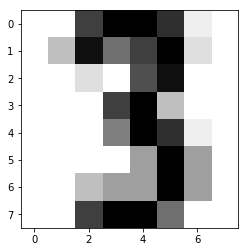

In [15]:
plt.figure()
plt.imshow(digits.images[345], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

### Run the Nearest Neighbor Classifier :

In [17]:
num = len(X_train) # Compute the number of points in X_train
distance = np.zeros(num) # Initialize an arrays of zeros
for i in range(num):
    distance[i] = dist(X_train[i], X_test) # Compute distance from X_train[i] to X_test
min_index = np.argmin(distance) # Get the index with smallest distance
print(Y_train[min_index])

3


In [18]:
print(digits.target[min_index])

3


## 以上邏輯講解 : https://video.cs50.net/2016/fall/lectures/7?t=48m29s

這個分類器的運作邏輯是 : 

計算這個test point和其他所有training set points的距離，套用前面定義的距離公式，把test point跟和他距離最近的規為同一類(同一個數字)

## Number of mistakes done in testing 100 images : 

In [42]:
num = len(X_train)
no_errors = 0
distance = np.zeros(num)
for j in range(1697, 1797):
    X_test = digits.data[j]
    for i in range(num):
        distance[i] = dist(X_train[i], X_test) # Compute distance from X_train[i] to X_test
    min_index = np.argmin(distance)
    if Y_train[min_index] != digits.target[j]:
        no_errors += 1
print(no_errors)
print("Accuracy = %s " % ((100 - no_errors) / 100) )

37
Accuracy = 0.63 


https://video.cs50.net/2016/fall/lectures/7?t=49m33s

-------------------------------

## Improving the performance

### Enlarge training data from 100 to 1000 images : 

In [43]:
X_train = digits.data[0:1000]
Y_train = digits.target[0:1000]

In [39]:
num = len(X_train)
no_errors = 0
distance = np.zeros(num)
for j in range(1697, 1797):
    X_test = digits.data[j]
    for i in range(num):
        distance[i] = dist(X_train[i], X_test) # Compute distance from X_train[i] to X_test
    min_index = np.argmin(distance)
    if Y_train[min_index] != digits.target[j]:
        no_errors += 1
print(no_errors)

print("Accuracy = %s " % ((100 - no_errors) / 100) )

3
Accuracy = 0.97 


-------------------

https://video.cs50.net/2016/fall/lectures/7?t=52m5s

# Deep Learning

https://video.cs50.net/2016/fall/lectures/7?t=56m21s

https://video.cs50.net/2016/fall/lectures/7?t=59m55s

https://video.cs50.net/2016/fall/lectures/7?t=1h0m1s

--------------

# Unspervised Learning

## Text Clustering

## Clustering points

### Unlabeled Data : K-Means

他做的事情就是mapping。

對於任何資料裡面的每一個元素，把每一個元素都標上坐標，變成n維坐標裡面的一個點，這樣就可以測量點和點之間的距離，來分群

### Bags of words : 

https://video.cs50.net/2016/fall/lectures/7?t=1h10m39s

轉換成出現頻率 :  https://video.cs50.net/2016/fall/lectures/7?t=1h11m26s

In [45]:
import numpy as np
import matplotlib.pyplot as plt
# To configure matplotlib to embed the plots in the output cells of the present notebook
%matplotlib notebook

### Creat data points (unlabeled) to be clustered :

In [46]:
X = np.array([[1,1], [2,2.5], [3,1.2], [5.5,6.3], [6,9], [7,6], [8,8]]) # Define numpy array of two-dim points

### Plot them :

<IPython.core.display.Javascript object>


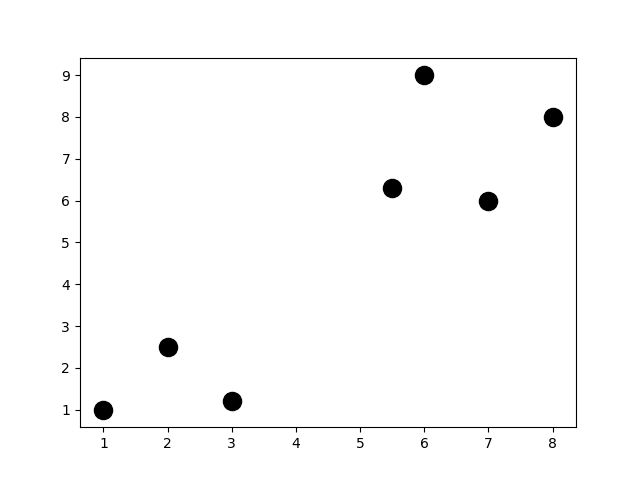

In [70]:
plt.figure()
plt.scatter(X[:,0], X[:,1], s = 170, color = 'black') # Plot points with slicing syntax X[:,0] and X[:,1]
plt.show()

## Import the K-Means Algorithm to Cluster Them : 

這次不一樣，這次直接import k-means套件來分類， 不像之前是以自訂距離函數作為分類依據

In [47]:
from sklearn.cluster import KMeans

### Run k-means with k = 2

In [72]:
k = 2 # Define the number of clusters in which we want to partion the data
kmeans = KMeans(n_clusters = k) # Run the algorithm kmeans
kmeans.fit(X);
centroids = kmeans.cluster_centers_ # Get centroid's coordinates for each cluster
labels = kmeans.labels_ # Get labels assigned to each data

### Plot the points with label assignments as given by k-means : 

<IPython.core.display.Javascript object>


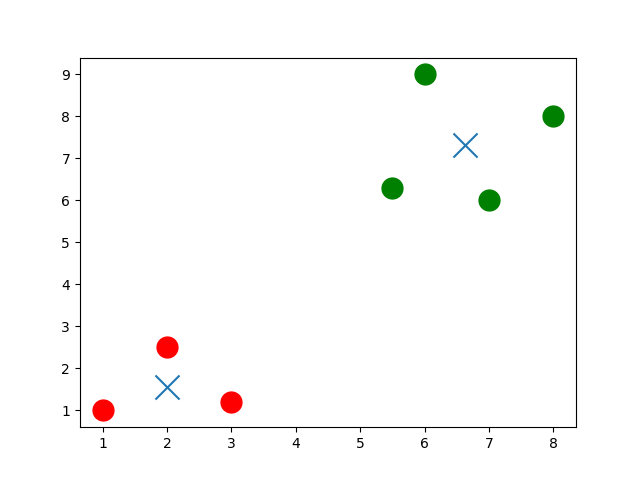

In [73]:
colors = ['r.', 'g.'] # Define two colors for the plot below
plt.figure()
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], colors[labels[i]], markersize = 30)
plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s = 300, linewidths = 5) # Plot centroids
plt.show()

### Run k-means with k = 3

<IPython.core.display.Javascript object>


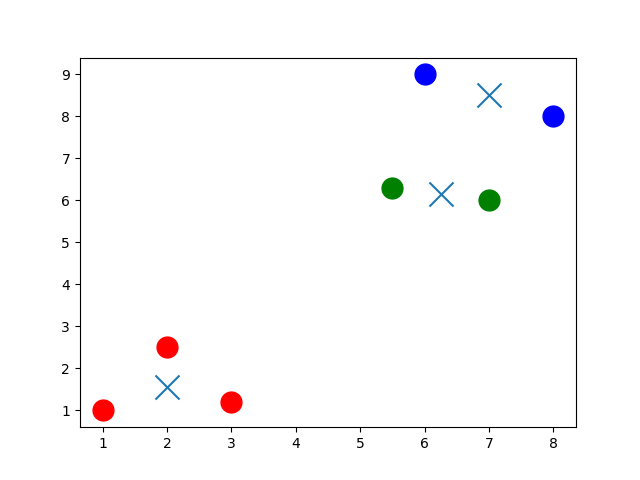

In [48]:
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(X);
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['r.', 'g.', 'b.']
plt.figure()
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], colors[labels[i]], markersize = 30)
plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s = 300, linewidths = 5)
plt.show()

### Run k-means with k = 7

<IPython.core.display.Javascript object>


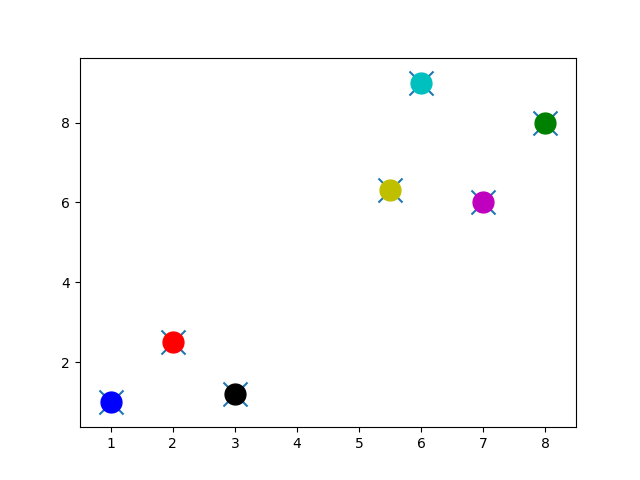

In [53]:
k = 7
kmeans = KMeans(n_clusters = k)
kmeans.fit(X);
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['r.', 'g.', 'y.', 'c.', 'b.', 'k.', 'm.']
plt.figure()
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], colors[labels[i]], markersize = 30)
plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s = 300, linewidths = 5)
plt.show()

---------------------------------------------------------------------------------------

## Clustering documents

### Create the following list of strings :

In [56]:
corpus = ['I love CS50. Staff is awesome, awesome, awesome!',
          'I have a dog and a cat.',
          'Best of CS50? Staff. And cakes. Ok, CS50 staff.',
          'My dog keeps chasing my cat. Dogs!'] # This represents a list of strings in Python

### Create the bag-of-words matrix :

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words = 'english')
Z = count_vect.fit_transform(corpus)
# The function fit_transform() takes as input a list of strings and does two things:
# first, it "fits the model," i.e., it builds the vocabulary; second, it transforms the data into a matrix.

Z.todense() # Generate a dense matrix from Z, which is stored as a sparse matrix data-type 

matrix([[3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2],
        [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]], dtype=int64)

### Take a look at the words in the vocabulary : 

In [58]:
vocab = count_vect.get_feature_names()
print(vocab)

['awesome', 'best', 'cakes', 'cat', 'chasing', 'cs50', 'dog', 'dogs', 'keeps', 'love', 'ok', 'staff']


### Create frequency matrix :

In [59]:
# Create tf–idf matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(corpus)
X.todense()

matrix([[ 0.89469821,  0.        ,  0.        ,  0.        ,  0.        ,
          0.23513012,  0.        ,  0.        ,  0.        ,  0.29823274,
          0.        ,  0.23513012],
        [ 0.        ,  0.        ,  0.        ,  0.70710678,  0.        ,
          0.        ,  0.70710678,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.35415727,  0.35415727,  0.        ,  0.        ,
          0.55844332,  0.        ,  0.        ,  0.        ,  0.        ,
          0.35415727,  0.55844332],
        [ 0.        ,  0.        ,  0.        ,  0.38274272,  0.48546061,
          0.        ,  0.38274272,  0.48546061,  0.48546061,  0.        ,
          0.        ,  0.        ]])

### Run k-means with k = 2 :

In [67]:
k = 2
# Define the number of clusters in which we want to partion THE data

# Define the proper notion of distance to deal with documents
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(X)
# Run the algorithm KMeans
model = KMeans(n_clusters = k)
model.fit(X);

### Vizualize output :

In [68]:
print("Top terms per cluster:\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print ("Cluster %i:" % i, end='')
    for ind in order_centroids[i, :3]:
        print (' %s,' % terms[ind], end='')
    print ("")

Top terms per cluster:

Cluster 0: awesome, staff, cs50,
Cluster 1: dog, cat, keeps,


----------------

## Clustering movies based on their IDMB synopses

資料來源  :  https://docs.google.com/spreadsheets/d/1udJ4nd9EKlX_awB90JCbKaStuYh6aVjh1X6j8iBUXIU/

In [69]:
import pandas as pd
from io import StringIO
import requests

act = requests.get('https://docs.google.com/spreadsheets/d/1udJ4nd9EKlX_awB90JCbKaStuYh6aVjh1X6j8iBUXIU/export?format=csv')
dataact = act.content.decode('utf-8') # To convert to string for Stringio
frame = pd.read_csv(StringIO(dataact))

In [70]:
print(frame)

                     Title                                           Synopsis
0       Mad Max: Fury Road  Max Rockatansky (Tom Hardy) explains in a voic...
1               The Matrix  The screen is filled with green, cascading cod...
2        The King's Speech  The film opens with Prince Albert, Duke of Yor...
3   No Country for Old Men  The film opens with a shot of desolate, wide-o...
4         A Beautiful Mind  John Nash (Russell Crowe) arrives at Princeton...
5                Inception  A young man, exhausted and delirious, washes u...
6                   Frozen  The Walt Disney Pictures logo and the movie ti...
7            The Lion King  The Lion King takes place in the Pride Lands o...
8                  Aladdin  The film starts with a street peddler, guiding...
9               Cinderella  The film opens in a tiny kingdom, and shows us...
10            Finding Nemo  Two clownfish, Marlin (Albert Brooks) and his ...
11               Toy Story  A boy called Andy Davis (voice: John

### Create list of string as in the previous example :

In [71]:
corpus = []
for i in range(0, frame["Synopsis"].size):
    corpus.append(frame["Synopsis"][i])

### Create frequency matrix

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 0.2)
# min_df = 0.2 means that the term must be in at least 20% of the documents
X = vectorizer.fit_transform(corpus)

### Run k-means with k = 2 :

In [73]:
k = 2 # Define the number of clusters in which we want to partion our data
# Define the proper notion of distance to deal with documents
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
# Run the algorithm kmeans
model = KMeans(n_clusters = k)
model.fit(X);

### Visualize the output

In [76]:
no_words = 4 # Number of words to print per cluster
order_centroids = model.cluster_centers_.argsort()[:, ::-1] # Sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()
labels = model.labels_ # Get labels assigned to each data

print("Top terms per cluster:\n")
for i in range(k):
    
    print("Cluster %d movies:" % i, end='')
    for title in frame["Title"][labels == i]:
        print(' %s,' % title, end='')
    print() #add a whitespace

    print("Cluster %d words:" % i, end='') 
    for ind in order_centroids[i, :no_words]:
        print (' %s' % terms[ind], end=','),
    print()
    print()

Top terms per cluster:

Cluster 0 movies: Mad Max: Fury Road, The Matrix, No Country for Old Men, A Beautiful Mind, Inception, The Lion King, Finding Nemo, Toy Story,
Cluster 0 words: says, tank, room, joe,

Cluster 1 movies: The King's Speech, Frozen, Aladdin, Cinderella, Robin Hood,
Cluster 1 words: king, prince, duke, palace,



https://video.cs50.net/2016/fall/lectures/7?t=1h17m21s